**NumPy** - это фундаментальный пакет для научных вычислений на Python. 
Он содержит, помимо прочего: 
* мощный N-мерный массив объектов
* полезные элементы линейной алгебры написанные на языке C / C ++ и Фортран
* преобразования Фурье и случайные чисела. 

Помимо очевидного научного использования, NumPy также может использоваться как эффективный многомерный контейнер данных.

In [1]:
import numpy as np

## Массивы

Массив numpy представляет собой сетку значений одного типа и индексируется кортежем неотрицательных целых чисел. Число измерений-это ранг массива; форма массива - это кортеж целых чисел, дающих размер массива вдоль каждого измерения.

Мы можем инициализировать массивы numpy из стандартных списков Python и получить доступ к элементам с помощью квадратных скобок:

In [2]:
a = np.array([1, 2, 3])
print(type([1, 2, 3]))
print(type(a))            
print(a.shape)            
print(a[0], a[1], a[2])   
a[0] = 5                  
print(a)                  

<class 'list'>
<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


In [3]:
b = np.array([[1,2,3],[4,5,6]])
print(b.shape)
print(b)
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
[[1 2 3]
 [4 5 6]]
1 2 4


NumPy включает в себя множество функций для создания массивов:

In [4]:
a = np.zeros((2,2))
print(a)  

[[0. 0.]
 [0. 0.]]


In [5]:
b = np.ones((1,2))
print(b)

[[1. 1.]]


In [6]:
c = np.full((2,2), 7)
print(c)

[[7 7]
 [7 7]]


In [7]:
d = np.eye(2)
print(d) 

[[1. 0.]
 [0. 1.]]


In [8]:
e = np.random.random((2,2))
print(e)

[[0.15441131 0.30720309]
 [0.08440775 0.35676251]]


Про все остальные способы создать массив можно прочитать в документации https://docs.scipy.org/doc/numpy/user/basics.creation.html#arrays-creation

## Индексации массива 
Numpy предлагает несколько способов индексирования.

### Срезы:
так же как в списках в Python.
Поскольку массивы могут быть многомерными, необходимо указать срез для каждого измерения массива.

In [10]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a, '\n')
b = a[:2, 1:3]
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] 

[[2 3]
 [6 7]]


Срез списка указывает на те же данные, изменяя срез мы изменим и исходный список

In [11]:
b[0, 0] = 123
print(a, '\n')
print(b)

[[  1 123   3   4]
 [  5   6   7   8]
 [  9  10  11  12]] 

[[123   3]
 [  6   7]]


### Целочисленное индексирование
При индексировании с помощью срезов резултат всегда будет подмассивом исходного. Целочисленное индексирование позволяет создавать произвольные массивы, используя данные из другого массива.

In [12]:
a = np.array([[1,2], [3, 4], [5, 6]])
b = a[[0, 1, 2], [0, 1, 0]]

print(a, a.shape, '\n')
print(b, b.shape)

[[1 2]
 [3 4]
 [5 6]] (3, 2) 

[1 4 5] (3,)


Пример выше эквивалентен такому:

In [13]:
b = np.array([a[0, 0], a[1, 1], a[2, 0]])
print(b, b.shape)

[1 4 5] (3,)


Так же можно использовать один и тот же элемент несколько раз

In [14]:
print(a[[0, 0], [1, 1]])
# Пример выше эквивалентен такому:
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


Один полезный трюк с целочисленным индексированием массива -- выбор или изменеие одного элемента из каждой строки матрицы:

In [15]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a, '\n')

# Создадим массив индексов
b = np.array([0, 2, 0, 1])

# Выбирем один элемент из скаждой строки по индексам из b
print(a[np.arange(4), b], '\n')  

# Изменим эти элементы
a[np.arange(4), b] += 10

print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[ 1  6  7 11] 

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Можно также смешивать целочисленное индексирование со срезами.Это даст массив более низкого ранга, чем исходный массив. 

In [16]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

row_r1 = a[1, :]    # Rank 1 ссылается на вторую строчку a
row_r2 = a[1:2, :]  # Rank 2 ссылается на вторую строчку a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


Со столбцами всё точно так же

In [17]:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape) 
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


### Логическое индексирование
позволяет выбирать произвольные элементы массива. Часто этот тип индексирования используется для выбора элементов массива, удовлетворяющих некоторому условию. Вот пример:

In [18]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Возвращает массив Booleans такого же размера как a

print(bool_idx)


[[False False]
 [ True  True]
 [ True  True]]


Используем логическое индексирование массива чтобы построить массив
состоящий из элементов `a`, соответствующих истинным значениям из `bool_idx`

In [19]:
print(a[bool_idx])

[3 4 5 6]


Всё можно записать в одну строчку. Очень лаконично

In [20]:
print(a[a > 2]) 

[3 4 5 6]


Для краткости мы оставили много деталей об индексации массива numpy; если вы хотите узнать больше, вы должны прочитать документацию. https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

## Типы данных
Каждый массив numpy представляет собой сетку элементов одного типа. Numpy содержит большой набор числовых типов данных, которые можно использовать для создания массивов. Numpy пытается угадать тип данных при создании массива, но функции, которые строят массивы, обычно также включают необязательный аргумент для явного указания типа данных. Вот пример:

In [21]:
x = np.array([1, 2])
print(x.dtype)

x = np.array([1.0, 2.0])   
print(x.dtype)

x = np.array([1, 2], dtype=np.float64)
print(x.dtype)                    

int32
float64
float64


В первых двух примерах тип данных выбрался автоматически. В третьем мы явно его указали.
Не будем подробно останавливаться на типах данных, если интересно вы можете прочитать подробнее в документации. https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html

## Арифметика массивов
Основные математические функции работают поелементно в массивах и доступны как в качестве перегрузок операторов, так и в качестве функций в модуле numpy:

In [22]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

Поэлементная сумма, разность, умножение, деление и квадратный корень

In [23]:
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [24]:
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [25]:
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [26]:
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [27]:
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Обратите внимание, что `x * y` это поэлементное умножене, а не матричное произведение из линала. Если нужно матричное произведение, нужно использовать специальную функцию.

In [29]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

Скалярное произведение векторов

In [30]:
print(v.dot(w))
print(np.dot(v, w))

219
219


Умножение матрицы на вектор

In [31]:
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


Матричное умножение

In [32]:
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy предоставляет множество полезных функций для выполнения вычислений на массивах; одна из самых полезных-`sum`:

In [33]:
x = np.array([[1,2],[3,4]])

print(x, '\n')

print(np.sum(x))          # Сумма всех элементов
print(np.sum(x, axis=0))  # Сумма каждого столбца
print(np.sum(x, axis=1))  # Сумма каждой строки

[[1 2]
 [3 4]] 

10
[4 6]
[3 7]


Полный список математических функций можете посмотреть в документации
https://docs.scipy.org/doc/numpy/reference/routines.math.html

Помимо вычисления математических функций с использованием массивов, нам часто приходится изменять или иным образом манипулировать данными в массивах. Самый простой пример такого типа операции-транспонирование матрицы; чтобы транспонировать матрицу, просто используйте атрибут T объекта array:

In [34]:
x = np.array([[1,2], [3,4]])
print(x,'\n')
print(x.T)

[[1 2]
 [3 4]] 

[[1 3]
 [2 4]]


Транспонирование ветора ничего не делает

In [35]:
v = np.array([1,2,3])
print(v)
print(v.T)

[1 2 3]
[1 2 3]


Numpy предоставляет гораздо больше функций для управления массивами; вы можете увидеть полный список в документации. https://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html

## Broadcasting
мощный механизм, позволяющий numpy работать с массивами различной формы при выполнении арифметических операций. Часто у нас есть меньший массив и больший массив, и мы хотим использовать меньший массив несколько раз для выполнения некоторой операции над большим массивом.

Например, предположим, что мы хотим добавить постоянный вектор к каждой строке матрицы. Мы можем сделать это так:

In [36]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Пустая (заполненная мусором) матрица той же размерности, что и x

# Для каждой строки матрицы x в цикле доболяем вектор v
for i in range(4):
    y[i, :] = x[i, :] + v

print(x, '\n')
print(y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]] 

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


### Это работает! 
Но, когда матрица `x` очень велика, вычисление цикла в Python может быть медленным. Обратите внимание, что добавление вектора v в каждую строку матрицы x эквивалентно формированию матрицы `vv` путем укладки нескольких копий v вертикально, а затем выполнения элементарного суммирования `x` и `vv`. Мы могли бы реализовать такой подход:

In [37]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))   # Склеить 4 копии вектора v друг на друга
print(vv, '\n')                 

y = x + vv  # Сложение из numpy
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]] 

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting позволяет нам выполнять это вычисление без фактического создания нескольких копий `v`.

In [38]:
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Строчка `y = x + v` работает несмотря на то, что `x.shape == (4, 3)` и `v.shape == (3,)`. Это работает как если бы  `v.shape`  было `(4,3)` где каждая строка была копией `v`, а сумма считается поэлементно.

Этот краткий обзор коснулся многих важных вещей, которые вы должны знать о numpy, но далек от завершения. По ссылке вы можете узнать много нового и полезного. https://docs.scipy.org/doc/numpy/reference/

## Зачем всё это?
Вы могли слышать, что один из минусов питона, это его большое время работы. NumPy пытается как-то решить эту проблему. Многие его функции реализованы на си или фортране. Рассмотрим пример

In [86]:
import time

size_of_vec = 30000

def python():
    start = time.time()
    X = range(size_of_vec)
    Y = range(size_of_vec)
    Z = [X[i] + Y[i] for i in range(len(X)) ]
    return time.time() - start

def numpy():
    start = time.time()
    X = np.arange(size_of_vec)
    Y = np.arange(size_of_vec)
    Z = X + Y
    return time.time() - start

print("Numpy is in this example {} times faster!".format(python()/numpy()))


Numpy is in this example 0.9979518962091045 times faster!


### Упражнение 1
Постройте график ускорения получаемого с использованием массивов numpy по сравнению со списками в питоне от размера массива. 
Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте. (можно использовать модуль Timer из библиотеки timeit)
* Используйте функцию `z = 2*x**2 + 4*y`
* Перемножение матриц размера n на n

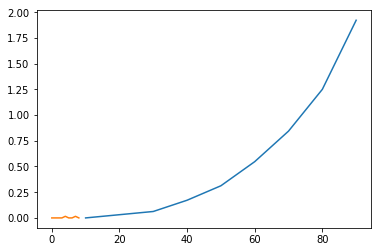

In [120]:
import time
import random

def python(n):
    start = time.time()
    a = np.random.random((n, n))
    b = np.random.random((n, n))
    c = []
    for i in range (n):
        c.append([])
        for j in range (n):
            ssum = 0
            for k in range(n):
                ssum += a[i][k] * b[k][j]
            c[i].append(ssum)
    return time.time() - start

def numpy(n):
    start = time.time()
    d = np.random.random((n, n))
    e = np.random.random((n, n))
    f = d.dot(e)
    return time.time() - start
t_python = []
t_numpy = []
n = np.arange(10, 100, 10)
for i in n:
    t_python.append(python(i))
    t_numpy.append(numpy(i))
plt.plot(t, t_python, t_numpy)
plt.show()

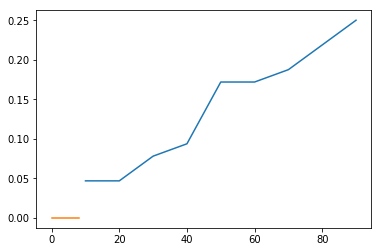

In [124]:
import time
import numpy as np
import matplotlib.pyplot as plt

def numpy():
    start = time.time()
    x = np.arange(size_of_vec)
    y = np.arange(size_of_vec)
    z = 2*x**2 + 4*y
    return time.time() - start

def python():
    start = time.time()
    x = range(size_of_vec)
    y = range(size_of_vec)
    z = [2*x[i]**2 + 4*y[i] for i in range(len(x))]
    return time.time() - start

t_python = []
t_numpy = []
size = np.arange(10000, 100000, 10000)
for size_of_vec in size:
    t_python.append(python())
    t_numpy.append(numpy())
plt.plot(t, t_python, t_numpy)
plt.show()

### Упражнение 2
* Создать массив чисел от 2 до 75. Вывести только нечётные. 
* Присвоить нечётным числам этого массива значение -1.


In [69]:
a = np.arange(2, 76, 1)

bool_idx = (a % 2 != 0)  
b = (a[bool_idx])
print (b)

a[bool_idx] = -1
print(a)

[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73 75]
[ 2 -1  4 -1  6 -1  8 -1 10 -1 12 -1 14 -1 16 -1 18 -1 20 -1 22 -1 24 -1
 26 -1 28 -1 30 -1 32 -1 34 -1 36 -1 38 -1 40 -1 42 -1 44 -1 46 -1 48 -1
 50 -1 52 -1 54 -1 56 -1 58 -1 60 -1 62 -1 64 -1 66 -1 68 -1 70 -1 72 -1
 74 -1]


### Упражнение 3
* прочитать про функцию reshape, запустить и понять все пимеры https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html?highlight=reshape#numpy.reshape
* Найти в документации функцию, которая удаляет из одного массива элементы, которые есть в другом. Вспомнить как то же самое проделать с множествами

In [81]:
a = np.zeros((10, 2))
b = a.T
c = b.view()
c.shape = (2, 10)
print(c)
print(c.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(2, 10)


In [80]:
a = np.arange(6).reshape((3, 2))
print(a)

[[0 1]
 [2 3]
 [4 5]]


In [111]:
a = np.array([[1,2,3], [4,5,6]])
np.reshape(a, 6)

array([1, 2, 3, 4, 5, 6])

In [6]:
import numpy as np
a = np.arange(1, 10, 1)
b = np.arange(3, 8, 2)
print(a, '\n', b)
print(np.setdiff1d(a, b))

[1 2 3 4 5 6 7 8 9] 
 [3 5 7]
[1 2 4 6 8 9]


### Упражнение 4

* Создать случаую квадратную матрицу случайного размера от 10 до 100. 
* Найти максимум и сумму элементов.
* Поделить каждый элемент на максимум.
* Отнять от каждой строки матрицы среднее по строке
* Заменить максимальное значение на -1.

In [58]:
import numpy as np
n = int(np.random.randint(10, 100, 1))
m = np.random.random((n, n))
print(m)

mmax = m.max()
msum = m.sum()
print(mmax, '\n')
print(msum, '\n')

print(m/mmax)
print('\n')

c = []
for i in range(n):
    ssum = 0
    for j in range(n):
        ssum = ssum + m[i][j]
    c.append(ssum/n)
    
print(c)
y = np.empty_like(m)
for i in range(n):
    y[i, :] = m[i, :] - c[i]
print(y)
print('\n')

m[m==np.max(m)] = -1
print(m)

[[0.34265019 0.04562952 0.01090118 ... 0.3724276  0.30475791 0.9268125 ]
 [0.16781324 0.15187112 0.20514162 ... 0.22442488 0.49781602 0.70677328]
 [0.14418626 0.59005225 0.62801045 ... 0.41527736 0.0816554  0.13751304]
 ...
 [0.06220778 0.4995135  0.6335959  ... 0.26513148 0.42100164 0.61413031]
 [0.47966312 0.33880373 0.21335408 ... 0.30501053 0.71991644 0.67494494]
 [0.77062975 0.22516481 0.78939839 ... 0.69236439 0.42330179 0.64740604]]
0.9989709067684689 

950.4448155121023 

[[0.34300317 0.04567653 0.01091241 ... 0.37281125 0.30507186 0.92776726]
 [0.16798612 0.15202757 0.20535294 ... 0.22465607 0.49832884 0.70750137]
 [0.14433479 0.59066009 0.6286574  ... 0.41570516 0.08173952 0.1376547 ]
 ...
 [0.06227186 0.50002807 0.6342486  ... 0.26540461 0.42143534 0.61476296]
 [0.48015724 0.33915275 0.21357387 ... 0.30532474 0.72065806 0.67564024]
 [0.77142362 0.22539677 0.79021159 ... 0.69307763 0.42373786 0.64807297]]


[0.5474374531304591, 0.4840996906069257, 0.4648156492834729, 0.424000

### Упражнение 5
* Научиться записывать наймпай массив в файл.
* Научиться читать массив из файла.

In [71]:
import numpy as np
x = np.arange(0, 15, 1)
np.savetxt('test.txt', x)
a = np.loadtxt('test.txt')
print(a)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


### Упражнение 6
* Как в массиве найти ближайший элемент к данному? 

In [74]:
import numpy as np
a = np.arange(100)
b = 10.51
index = (np.abs(a-b)).argmin()
print(a[index])

11


### Упражнение*
* Напишите игру жизнь используя массивы нампай.
